hist plot for Vani and CoCo

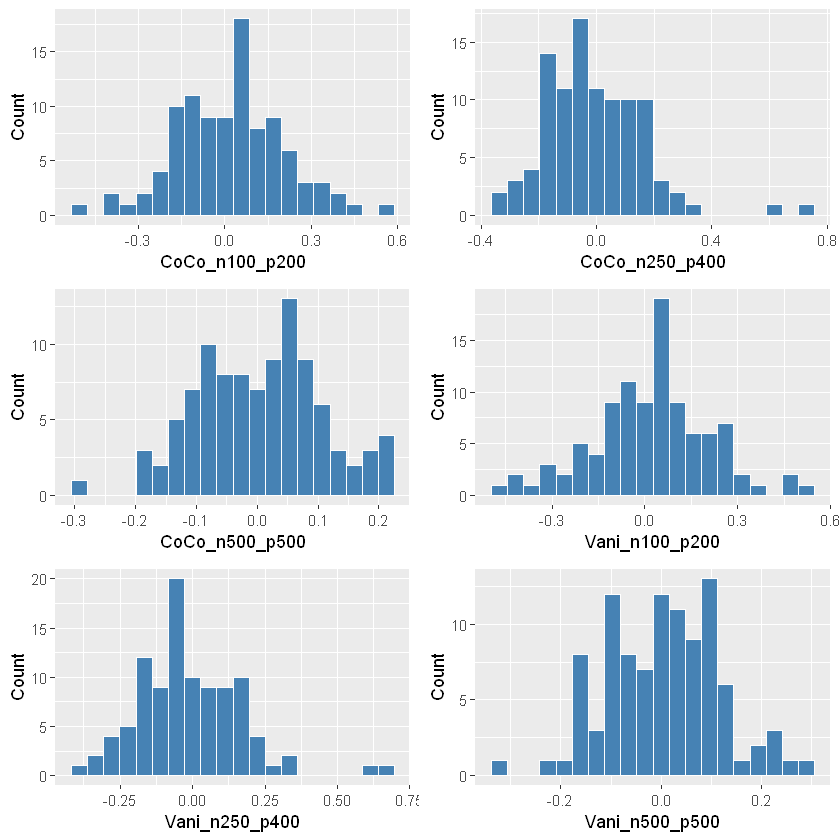

In [53]:
library(openxlsx)
library(tidyr)
library(ggplot2)
library(dplyr)
library(gridExtra)
data <- read.xlsx("sum_of_betas.xlsx")
data <- as.data.frame(data) %>% select(contains("CoCo"), contains("Vani"))

# histograms
plot_list <- list()
for (i in 1:ncol(data)) {
    plot_list[[i]] <- ggplot(data, aes_string(x = colnames(data)[i])) + 
        geom_histogram(bins = 20, fill = "steelblue", color = "white") + 
        labs(x = colnames(data)[i], y = "Count")
}
grid.arrange(grobs = plot_list, ncol = 2)

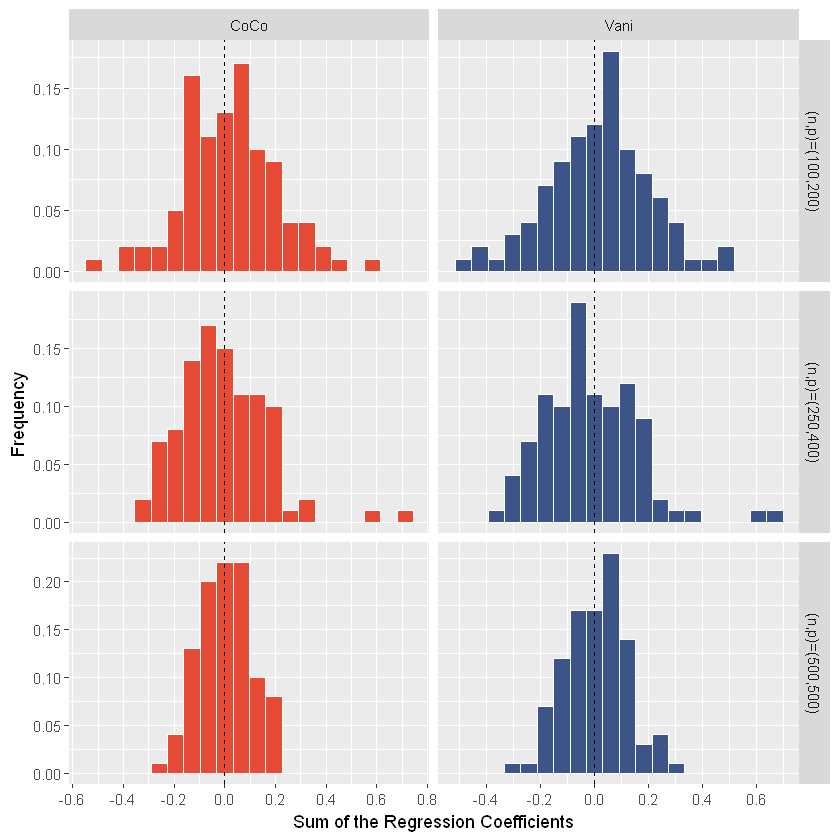

In [130]:
library(openxlsx)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(gridExtra)

data <- read.xlsx("sum_of_betas.xlsx")
data <- as.data.frame(data) %>% select(contains("CoCo"), contains("Vani")) 

col_names <- colnames(data)

data_long <- data %>% pivot_longer(everything(), names_to = "Variable", values_to = "Value")
# Transform the data
data_long <- data_long %>%
  # Split the Variable column
  separate(Variable, into = c("Type", "n", "p"), sep = "_") %>%
  mutate(n = as.numeric(n), p = as.numeric(p)) %>%
  mutate("(n,p)" = paste0("(n,p)=(", n, ",", p, ")")) %>%
  select(-c(n, p))

ggplot(data_long, aes(x = Value, fill = ifelse(grepl("CoCo", Type), "#E64B35FF", "#3C5488FF"))) + 
  geom_histogram(aes(y=after_stat(count/100)),bins = 20, color = "white") + 
  # facet_wrap(~ Variable, scales = "fixed", ncol = 2, nrow = 3,dir="v") +
  geom_vline(aes(xintercept=0), linetype="dashed", color = "black") + 
  facet_grid(vars(`(n,p)`), vars(Type), scales = "free") +
  labs(x = "Sum of the Regression Coefficients", y = "Frequency ") +
  scale_x_continuous(breaks = seq(-.8, .8, 0.2)) +
  scale_fill_identity()

hist plot for sum of betas

Warning message:
"package 'patchwork' was built under R version 4.2.3"


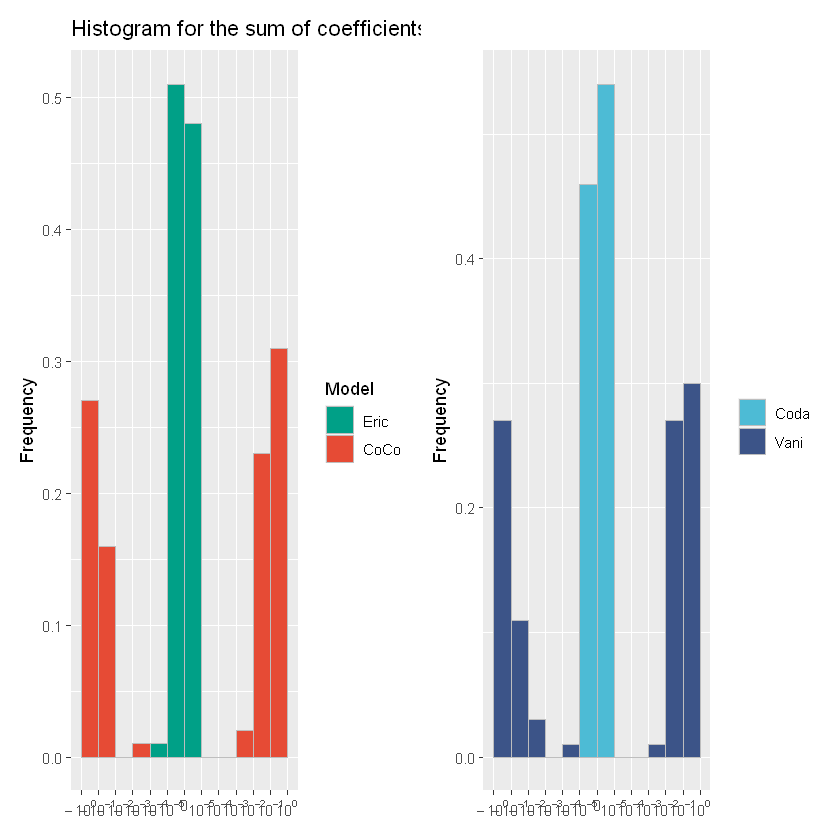

In [11]:
load(file='data_plot\\CoCo+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Eric+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)
library(patchwork)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "CoCo"
interval_counts_df_eric$Dataset <- "Eric"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p1 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(title="Histogram for the sum of coefficients at (n,p)=(100,200)", y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("CoCo" = "#E64B35FF", "Eric" = "#00A087FF"), breaks = c("Eric", "CoCo"),name="Model") +
  theme(panel.grid.minor.x = element_blank(),axis.title.x = element_blank())

load(file='data_plot\\Vani+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Coda+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "Vani"
interval_counts_df_eric$Dataset <- "Coda"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p2 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("Coda" = "#4DBBD5FF", "Vani" = "#3C5488FF"), breaks = c("Coda", "Vani"),name=element_blank()) +
  theme(panel.grid.minor.x = element_blank())

# library(patchwork)
# p1+p2+plot_layout(guides = "auto")

In [289]:
load(file='data_plot\\CoCo+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Eric+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "CoCo"
interval_counts_df_eric$Dataset <- "Eric"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p3 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(title="Histogram for the sum of coefficients at (n,p)=(250,400)", y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("CoCo" = "#E64B35FF", "Eric" = "#00A087FF"), breaks = c("Eric", "CoCo"),name="Model") +
  theme(panel.grid.minor.x = element_blank(),axis.title.x = element_blank())

load(file='data_plot\\Vani+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Coda+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "Vani"
interval_counts_df_eric$Dataset <- "Coda"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p4 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("Coda" = "#4DBBD5FF", "Vani" = "#3C5488FF"), breaks = c("Coda", "Vani"),name=element_blank()) +
  theme(panel.grid.minor.x = element_blank())

In [288]:
load(file='data_plot\\CoCo+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Eric+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "CoCo"
interval_counts_df_eric$Dataset <- "Eric"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p5 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(title="Histogram for the sum of coefficients at (n,p)=(500,500)", y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("CoCo" = "#E64B35FF", "Eric" = "#00A087FF"), breaks = c("Eric", "CoCo"),name="Model") +
  theme(panel.grid.minor.x = element_blank(),axis.title.x = element_blank())

load(file='data_plot\\Vani+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
coco100 <- as.data.frame(tmp)
load(file='data_plot\\Coda+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
Eric100 <- as.data.frame(tmp)

sequence <- c(-10^seq(0,-5,-1),0, 10^seq(-5,0,1))
legend_labels <- sequence
legend_labels[c(1:6)] <-  sprintf("-10^{%s}", seq(0,-5,-1))
legend_labels[c(8:13)] <-  sprintf("10^{%s}", seq(-5,0,1))
legend_labels <- sapply(legend_labels, function(x) parse(text = x))

# Assuming the data is in the 'value' column of coco100
coco100$interval <- cut(coco100$tmp, breaks = sequence, include.lowest = TRUE)

interval_counts_df <- as.data.frame(table(coco100$interval))
names(interval_counts_df) <- c("Interval", "Count")

# Load ggplot2
library(ggplot2)

# Calculate xmin, xmax, ymin, and ymax
interval_counts_df$Interval <- as.character(interval_counts_df$Interval)
interval_counts_df$xmin <- 1:12-1
interval_counts_df$xmax <- 1:12
interval_counts_df$ymin <- 0
interval_counts_df$ymax <- interval_counts_df$Count/100


# Prepare Eric100 data
Eric100$interval <- cut(Eric100$tmp, breaks = sequence, include.lowest = TRUE)
interval_counts_df_eric <- as.data.frame(table(Eric100$interval))
names(interval_counts_df_eric) <- c("Interval", "Count")

# Calculate xmin, xmax, ymin, and ymax for Eric100
interval_counts_df_eric$Interval <- as.character(interval_counts_df_eric$Interval)
interval_counts_df_eric$xmin <- 1:12-1
interval_counts_df_eric$xmax <- 1:12
interval_counts_df_eric$ymin <- 0
interval_counts_df_eric$ymax <- interval_counts_df_eric$Count/100

# Add a new column 'Dataset' to both data frames
interval_counts_df$Dataset <- "Vani"
interval_counts_df_eric$Dataset <- "Coda"

# Combine the two data frames
combined_df <- rbind(interval_counts_df_eric, interval_counts_df)

# Create the histogram-like plot
p6 <- ggplot() +
  geom_rect(data = combined_df, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=Dataset), color="grey") +
  labs(y="Frequency") +
  scale_x_continuous(breaks=1:13-1,labels = legend_labels) +
  scale_fill_manual(values = c("Coda" = "#4DBBD5FF", "Vani" = "#3C5488FF"), breaks = c("Coda", "Vani"),name=element_blank()) +
  theme(panel.grid.minor.x = element_blank())

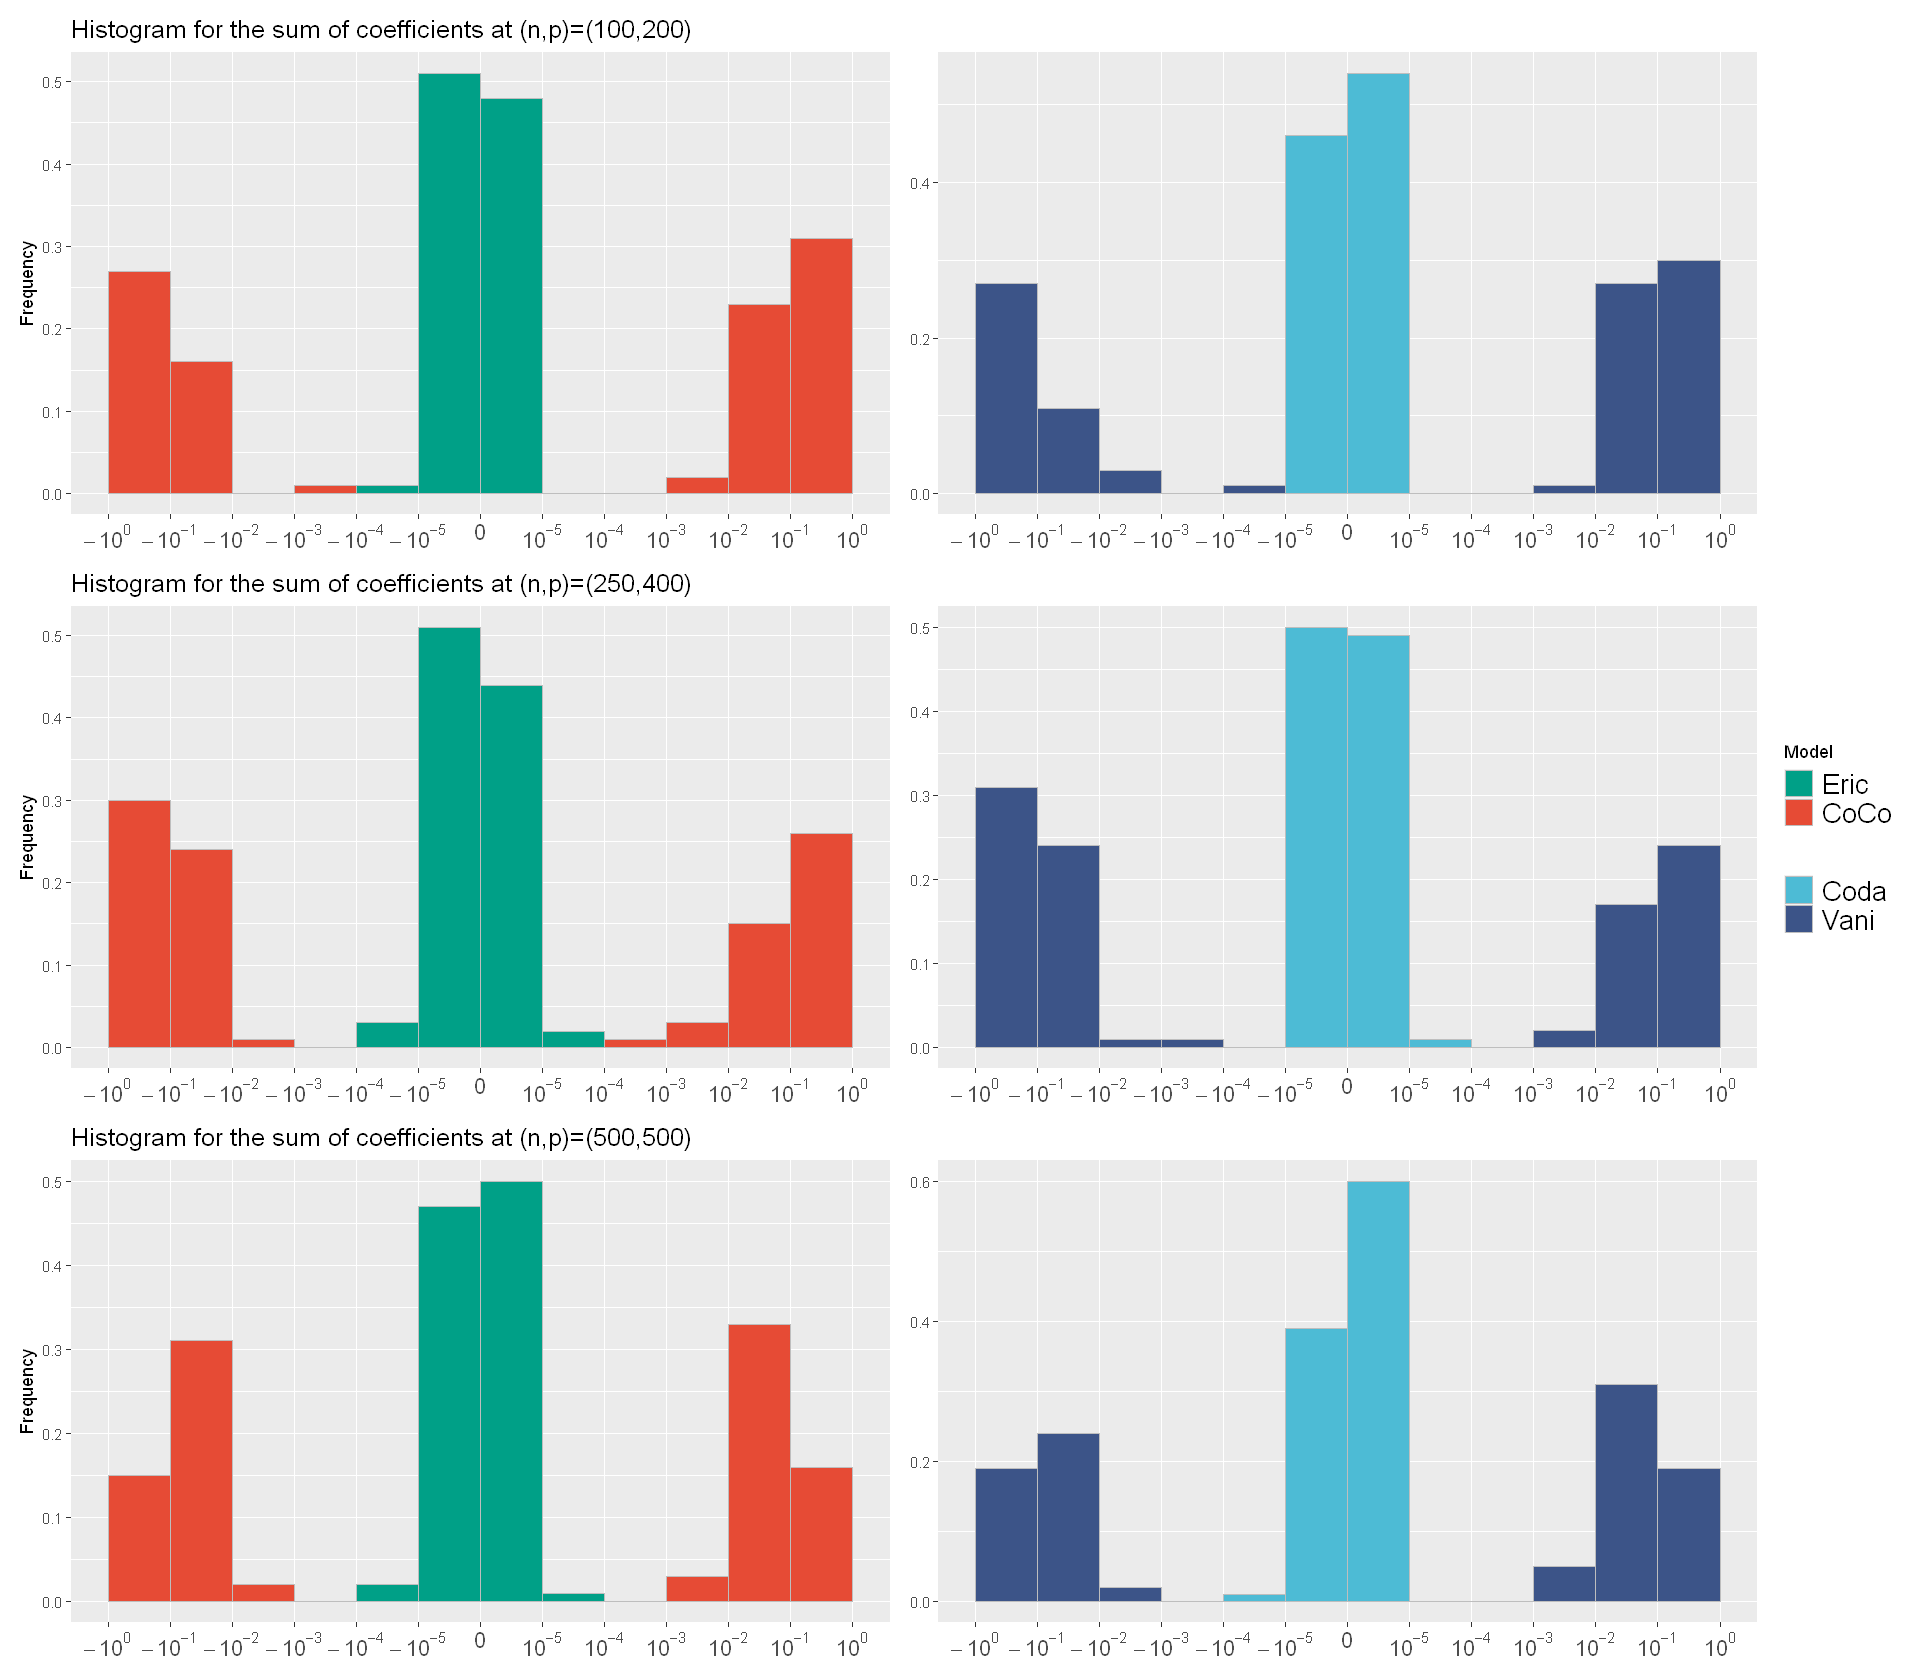

In [290]:
library(patchwork)
p2 <- p2+theme(axis.title.y = element_blank())
p4 <- p4+theme(axis.title.y = element_blank())
p6 <- p6+theme(axis.title.y = element_blank())
(p1+p2)/(p3+p4)/(p5+p6)+plot_layout(guides = 'collect')&theme(legend.text = element_text(size = 16),axis.text.x = element_text(size=13),plot.title = element_text(size=15))  # Modify the size as needed
options(repr.plot.width=16, repr.plot.height=14)

Warning message:
"package 'patchwork' was built under R version 4.2.3"
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


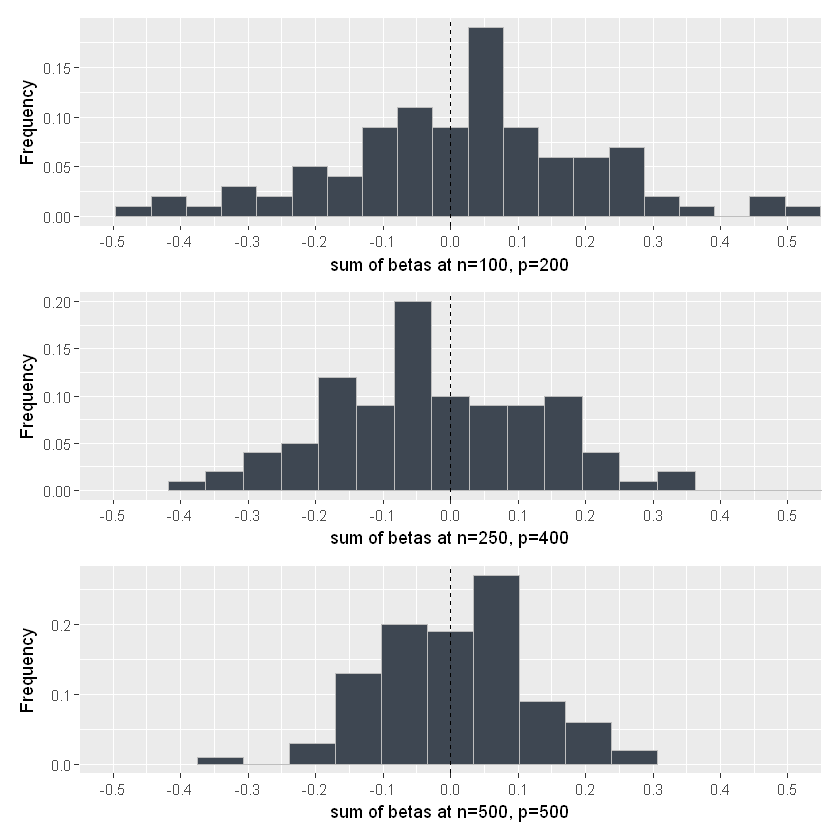

In [1]:
load(file='data_plot\\Vani+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data100 <- as.data.frame(tmp)
load(file='data_plot\\Vani+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data250 <- as.data.frame(tmp)
load(file='data_plot\\Vani+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data500 <- as.data.frame(tmp)

library(ggplot2)
library(patchwork)

# Plot histogram with small breaks and boxplot side by side
p1 <- ggplot(data100, aes(x = tmp)) +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 20, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=100, p=200", y = "Frequency") +
    # xlim(-0.5, 0.5) +
    scale_color_brewer('Set1') +
    coord_cartesian(xlim = c(-0.5, 0.5)) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1))

p2 <- ggplot(data250, aes(x = tmp)) +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 20, fill = "#3e4752", color = "grey") +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=250, p=400", y = "Frequency") +
    # xlim(-0.5, 0.5) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1))

p3 <- ggplot(data500, aes(x = tmp)) +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 10, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=500, p=500", y = "Frequency") +
    coord_cartesian(xlim = c(-0.5, 0.5)) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1)) +
    geom_vline(aes(xintercept=0), color="black", linetype="dashed")

# Set the same xlim for both plots
p1 <- p1 + coord_cartesian(xlim = c(-0.5, 0.5))
p2 <- p2 + coord_cartesian(xlim = c(-0.5, 0.5))
p1 <- p1 + geom_vline(aes(xintercept=0), color="black", linetype="dashed")
p2 <- p2 + geom_vline(aes(xintercept=0), color="black", linetype="dashed")
# grid.arrange(p1, p2, ncol = 1)

p1 + p2 + p3 + plot_layout(ncol = 1)


Warning message:
"package 'patchwork' was built under R version 4.2.3"
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


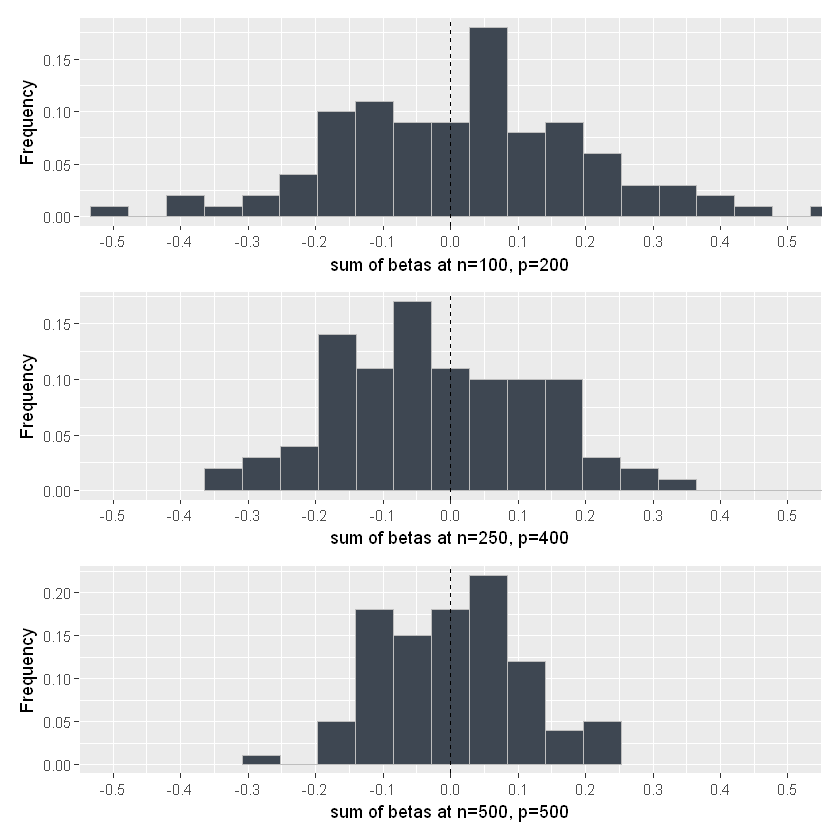

In [2]:
load(file='data_plot\\CoCo+dirichlet_n100_p200_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data100 <- as.data.frame(tmp)
load(file='data_plot\\CoCo+dirichlet_n250_p400_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data250 <- as.data.frame(tmp)
load(file='data_plot\\CoCo+dirichlet_n500_p500_tau0.5_rho0.5_sigma0.5_Nsim100.RData')
data500 <- as.data.frame(tmp)

library(ggplot2)
library(patchwork)

# Plot histogram with small breaks and boxplot side by side
p1 <- ggplot(data100, aes(x = tmp)) +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 20, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=100, p=200", y = "Frequency") +
    # xlim(-0.5, 0.5) +
    scale_color_brewer('Set1') +
    coord_cartesian(xlim = c(-0.5, 0.5)) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1))

p2 <- ggplot(data250, aes(x = tmp)) +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 20, fill = "#3e4752", color = "grey") +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=250, p=400", y = "Frequency") +
    # xlim(-0.5, 0.5) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1))

p3 <- ggplot(data500, aes(x = tmp)) +
    # geom_histogram(bins = 20, fill = "#3e4752", color = "grey") +
    geom_histogram(aes(y = after_stat(count / sum(count))),bins = 10, fill = "#3e4752", color = "grey") +
    # geom_density(color = "red") +
    labs(x = "sum of betas at n=500, p=500", y = "Frequency") +
    coord_cartesian(xlim = c(-0.5, 0.5)) +
    scale_x_continuous(breaks = seq(-0.5, 0.5, 0.1)) +
    geom_vline(aes(xintercept=0), color="black", linetype="dashed")

# Set the same xlim for both plots
p1 <- p1 + coord_cartesian(xlim = c(-0.5, 0.5))
p2 <- p2 + coord_cartesian(xlim = c(-0.5, 0.5))
p1 <- p1 + geom_vline(aes(xintercept=0), color="black", linetype="dashed")
p2 <- p2 + geom_vline(aes(xintercept=0), color="black", linetype="dashed")
# grid.arrange(p1, p2, ncol = 1)

p1 + p2 + p3 + plot_layout(ncol = 1)


Freq Plot

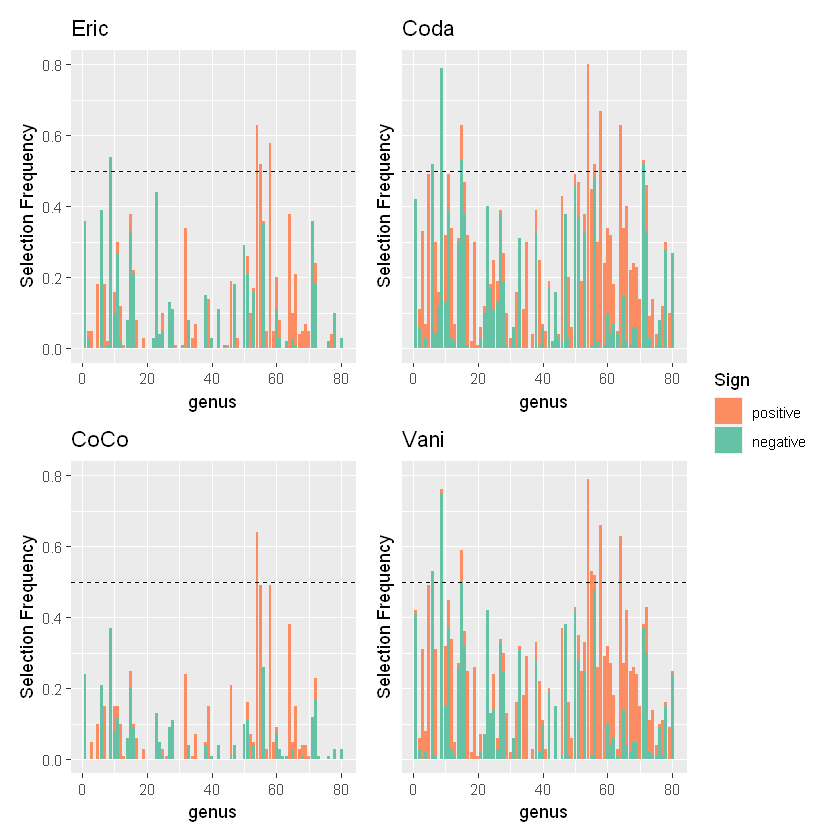

In [141]:
library(ggplot2)
library(tidyr)
library(reshape2)
library(patchwork)
count_values <- function(x) {
    c('positive' = sum(x > 0), 'negative' = sum(x < 0))
}
load("data_freq/RDA1_support.RData")
plots <- list()
for(model_name in names(support)){
data <- as.data.frame(support[[model_name]])

freq_df <- as.data.frame(apply(data, 2, count_values)) / nrow(data)
colnames(freq_df) <- 1:ncol(data)
freq_df <- freq_df %>% t  %>% melt 


plots[[model_name]] <- ggplot(freq_df, aes(x = Var1, y = value, fill = Var2)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0.5, linetype="dashed", color = "black") +
  coord_cartesian(ylim=c(0,0.8)) +
  # scale_y_continuous(breaks = seq(0, 1, 0.1)) +
  scale_fill_manual(values = c("positive" = "#FC8D62", "negative" = "#66C2A5"),name="Sign") +
  # scale_fill_brewer(palette = "Set2", name = "Sign of Beta",breaks=c("positive","negative"),labels=c("Positive","Negative")) +
  labs(title = ifelse(model_name=='CoDA','Coda',model_name), y = "Selection Frequency",x="genus") 
if (model_name %in% c("CoDA","Vani")) 
  plots[[model_name]] <- plots[[model_name]] + theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())
}
plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] + plot_layout(guides = "collect")
# Save the plot
ggsave(filename = "Freq_plot.png", plot = plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] + plot_layout(guides = "collect"), width = 10, height = 5)

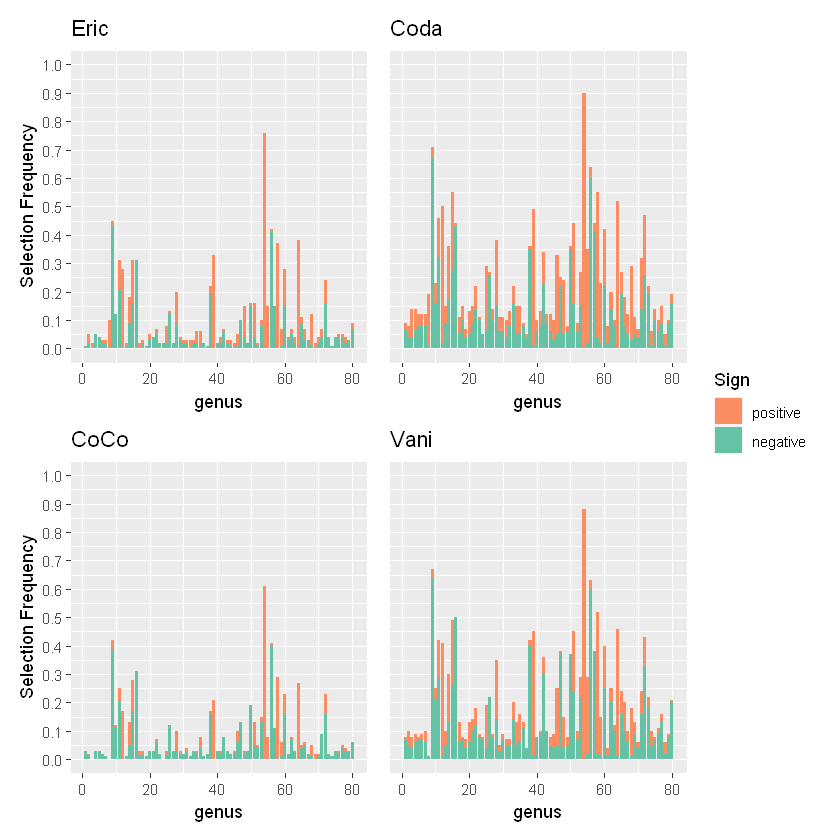

In [9]:
library(ggplot2)
library(tidyr)
library(reshape2)
library(patchwork)
count_values <- function(x) {
    c('positive' = sum(x > 0), 'negative' = sum(x < 0))
}
load("data_freq/RDA2_betas.RData")
plots <- list()
for(model_name in names(support)){
data <- as.data.frame(support[[model_name]])

freq_df <- as.data.frame(apply(data, 2, count_values)) / nrow(data)
colnames(freq_df) <- 1:ncol(data)
freq_df <- freq_df %>% t  %>% melt 


plots[[model_name]] <- ggplot(freq_df, aes(x = Var1, y = value, fill = Var2)) +
  geom_bar(stat = "identity") +
  # geom_hline(yintercept = 0.5, linetype="dashed", color = "black") +
  coord_cartesian(ylim=c(0,1.0)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1)) +
  scale_fill_manual(values = c("positive" = "#FC8D62", "negative" = "#66C2A5"),name="Sign") +
  # scale_fill_brewer(palette = "Set2", name = "Sign of Beta",breaks=c("positive","negative"),labels=c("Positive","Negative")) +
  labs(title = ifelse(model_name=='CoDA','Coda',model_name), y = "Selection Frequency",x="genus") 
if (model_name %in% c("CoDA","Vani")) 
  plots[[model_name]] <- plots[[model_name]] + theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(),axis.title.y = element_blank())
}
plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] + plot_layout(guides = "collect")
# Save the plot
ggsave(filename = "Freq_plot y1.png", plot = plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] + plot_layout(guides = "collect"), width = 10, height = 5)

In [53]:
# Initialize an empty list
count_values_support <- function(x) {
    sum(x!=0)
}
library(openxlsx)
library(tidyr)
load("data_freq/RDA1_betas.RData")
df <- data.frame()
for(model_name in names(support)){
    data <- as.data.frame(support[[model_name]])
    freq_df <- as.data.frame(apply(data, 2, count_values_support)) %>% t
    row.names(freq_df) <- model_name
    df <- rbind(df, freq_df)  # Append the data frame to the list

    # Append the data frame to the list
}
load("data_freq/RDA2_betas.RData")
for(model_name in names(support)){
    data <- as.data.frame(support[[model_name]])
    freq_df <- as.data.frame(apply(data, 2, count_values_support)) %>% t
    row.names(freq_df) <- model_name
    df <- rbind(df, freq_df)  # Append the data frame to the list

    # Append the data frame to the list
}
# write.xlsx(df, file="freq_df.xlsx", row.names = TRUE, append=TRUE,overwrite = TRUE)

In [58]:
a=df[4,]
print(sum(a>60))

[1] 1


In [6]:

# Write
write.xlsx(df, file="freq_df.xlsx", row.names = TRUE, append=TRUE,overwrite = TRUE)

Warning message:
"Please use 'rowNames' instead of 'row.names'"


ROC curve

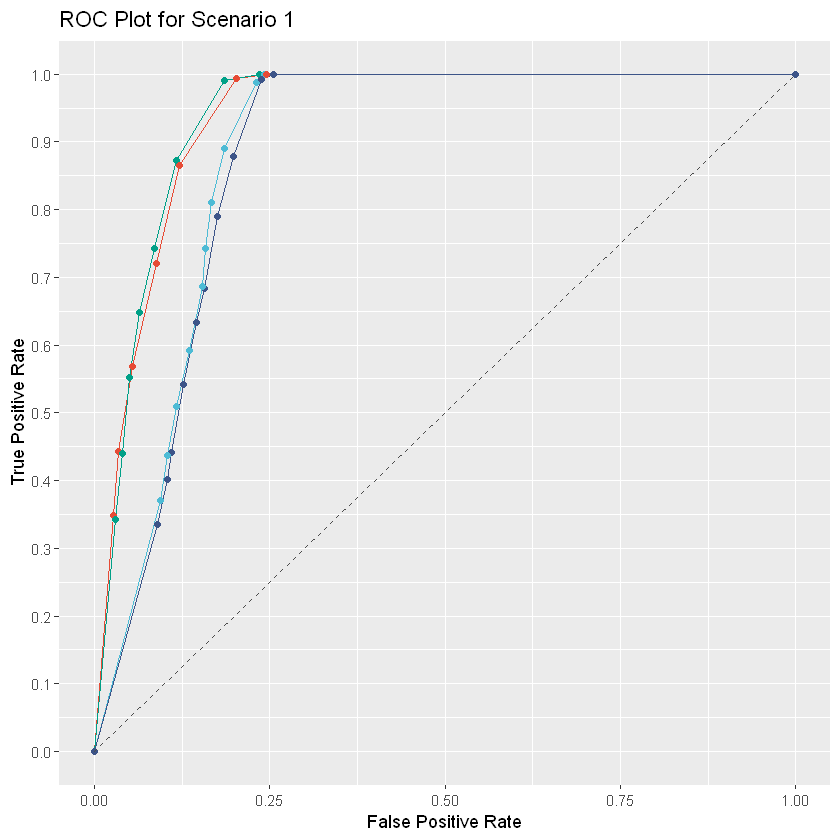

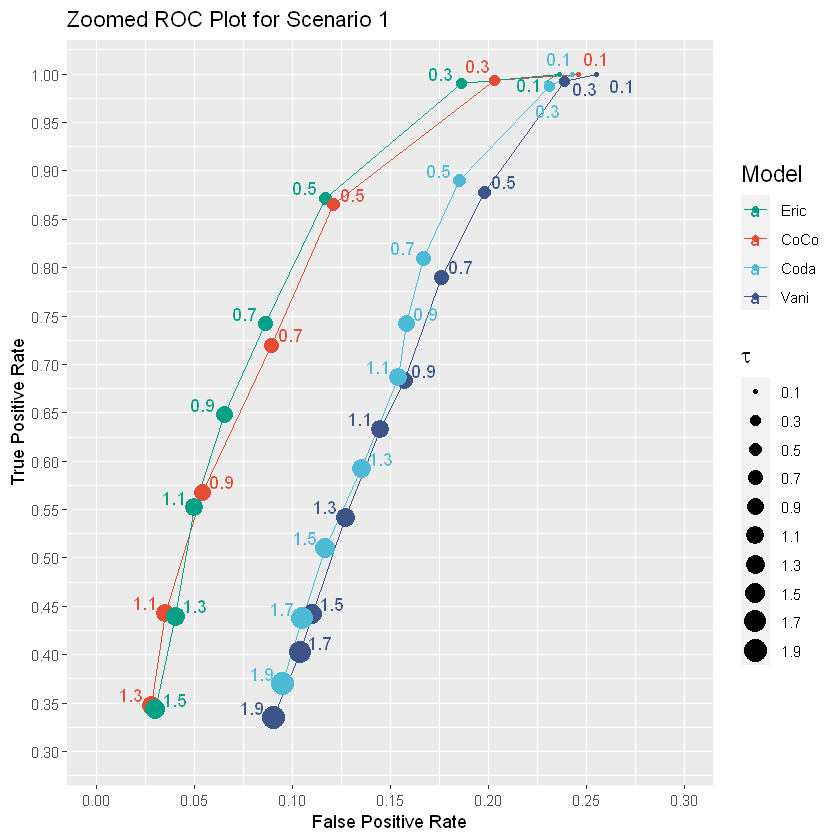

In [8]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(ggsci)
library("ggrepel")   
# Read the CSV file
data <- read.csv("data/ROC.csv")

# Extract mean and standard deviation values
data$FPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$FPR))
data$FPR_std <- str_extract(data$FPR, "\\((.*?)\\)")
data$FPR_std <- as.numeric(gsub("\\(|\\)", "", data$FPR_std))
data$TPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$TPR))
data$TPR_std <- str_extract(data$TPR, "\\((.*?)\\)")
data$TPR_std <- as.numeric(gsub("\\(|\\)", "", data$TPR_std))
data$tau <- as.numeric(data$tau)

# Create ROC plot
p1 <- ggplot(data, aes(x = FPR_mean, y = TPR_mean, color = model)) +
    # scale_color_discrete(breaks=c("Eric","CoCo","CoDA","Vani"),name="Model")  +
    geom_line() +
    geom_point() +
    # geom_point(aes(size = tau)) +
    # scale_color_brewer(palette = "Dark2") + 
    # scale_size(range = c(1, 4)) +
    # scale_size_continuous(breaks=unique(data$tau), labels=unique(data$tau),name = expression(tau)) +
    # geom_text_repel(aes(label = tau), vjust = 1) +
    guides(fill=FALSE,color = guide_legend(order = 1), size = guide_legend(order = 2)) + # Change the order of the legends
    labs(x = "False Positive Rate", y = "True Positive Rate", title = "ROC Plot for Scenario 1") +
    scale_y_continuous(breaks = seq(0, 1, by = 0.1),limits = c(0., 1)) +
    # xlim(0, .3) +
    theme(legend.title = element_text(size = 14)) +
    scale_color_npg(breaks=c("Eric","CoCo","CoDA","Vani"),name="Model",lab=c("Eric","CoCo","Coda","Vani")) +
    scale_fill_npg() +
    geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1),color="#4a4a4a",linetype="dashed") 

p1 + guides(fill=FALSE,color=FALSE)
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(ggsci)
library("ggrepel")  

data <- read.csv("data/ROC.csv")
data <- data %>% filter(tau!='NA')

# Extract mean and standard deviation values
data$FPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$FPR))
data$FPR_std <- str_extract(data$FPR, "\\((.*?)\\)")
data$FPR_std <- as.numeric(gsub("\\(|\\)", "", data$FPR_std))
data$TPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$TPR))
data$TPR_std <- str_extract(data$TPR, "\\((.*?)\\)")
data$TPR_std <- as.numeric(gsub("\\(|\\)", "", data$TPR_std))
data$tau <- as.numeric(data$tau)


p2 <- ggplot(data, aes(x = FPR_mean, y = TPR_mean, color = model)) +
    geom_line() +
    geom_point(aes(size=tau)) +
   scale_size_continuous(breaks=unique(data$tau), labels=unique(data$tau),name = expression(tau)) +
    geom_text_repel(aes(label = tau), vjust = 1) +
    guides(fill=FALSE) + # Change the order of the legends
    labs(x = "False Positive Rate", y = "True Positive Rate", title = "Zoomed ROC Plot for Scenario 1") +
    scale_y_continuous(breaks = seq(0, 1, by = 0.05),limits = c(0.3, 1)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.05),limits = c(0, 0.3)) +
    theme(legend.title = element_text(size = 14)) +
    scale_color_npg(breaks=c("Eric","CoCo","CoDA","Vani"),name="Model",lab=c("Eric","CoCo","Coda","Vani")) +
    scale_fill_npg()


# p1 + guides(fill=FALSE,color=FALSE)
p2

ROC for S2

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_text_repel()`)."


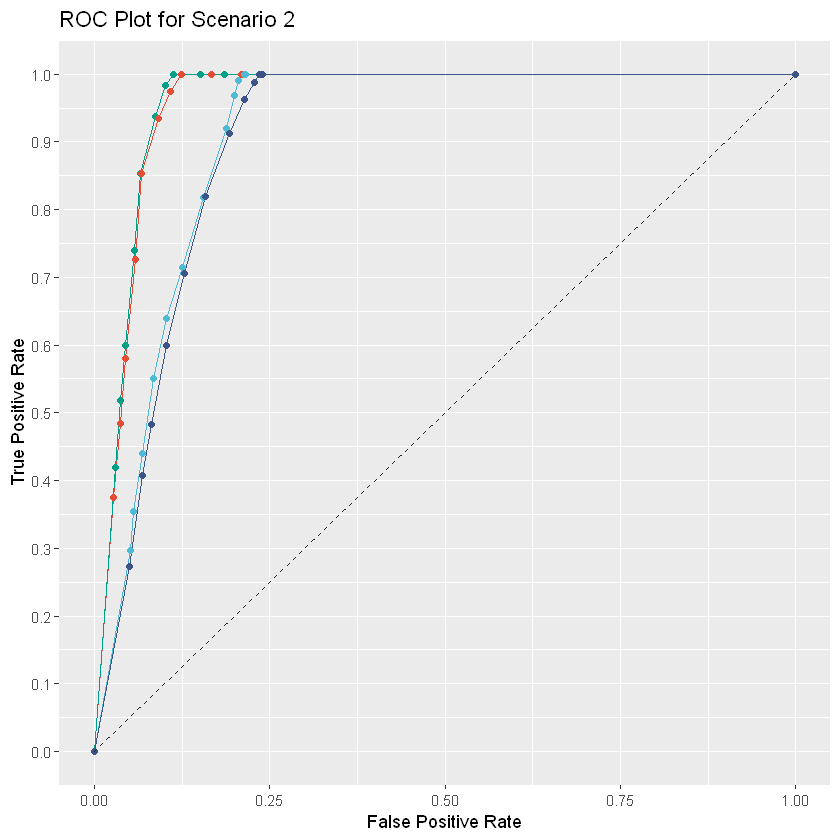

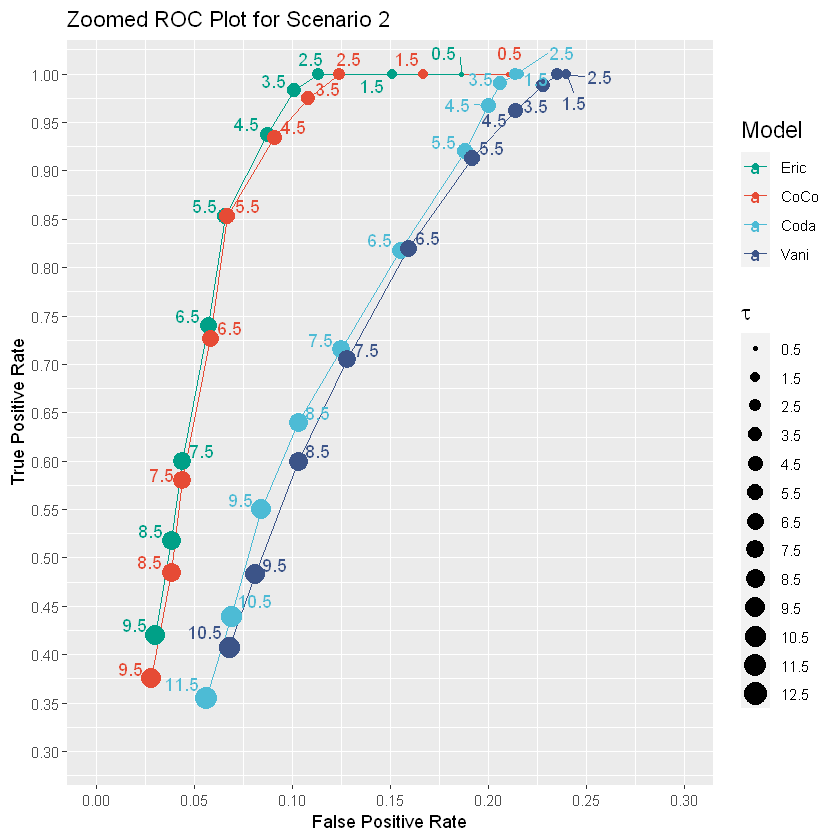

In [7]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(ggsci)
library("ggrepel")   
# Read the CSV file
data <- read.csv("data/ROC_diri.csv")

# Extract mean and standard deviation values
data$FPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$FPR))
data$FPR_std <- str_extract(data$FPR, "\\((.*?)\\)")
data$FPR_std <- as.numeric(gsub("\\(|\\)", "", data$FPR_std))
data$TPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$TPR))
data$TPR_std <- str_extract(data$TPR, "\\((.*?)\\)")
data$TPR_std <- as.numeric(gsub("\\(|\\)", "", data$TPR_std))
data$tau <- as.numeric(data$tau)

# Create ROC plot
p1 <- ggplot(data, aes(x = FPR_mean, y = TPR_mean, color = model)) +
    geom_line() +
    geom_point() +
    scale_color_npg(breaks=c("Eric","CoCo","Coda","Vani"),name="Model",lab=c("Eric","CoCo","Coda","Vani")) +
    guides(fill=FALSE,color = guide_legend(order = 1), size = guide_legend(order = 2)) + # Change the order of the legends
    labs(x = "False Positive Rate", y = "True Positive Rate", title = "ROC Plot for Scenario 2") +
    scale_y_continuous(breaks = seq(0, 1, by = 0.1),limits = c(0., 1)) +
    theme(legend.title = element_text(size = 14)) +
    geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1),color="#252525",linetype="dashed") 

p1 + guides(fill=FALSE,color=FALSE)
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(ggsci)
library("ggrepel")  

data <- read.csv("data/ROC_diri.csv")
data <- data %>% filter(tau!='NA')

# Extract mean and standard deviation values
data$FPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$FPR))
data$FPR_std <- str_extract(data$FPR, "\\((.*?)\\)")
data$FPR_std <- as.numeric(gsub("\\(|\\)", "", data$FPR_std))
data$TPR_mean <- as.numeric(gsub("\\(.*\\)", "", data$TPR))
data$TPR_std <- str_extract(data$TPR, "\\((.*?)\\)")
data$TPR_std <- as.numeric(gsub("\\(|\\)", "", data$TPR_std))
data$tau <- as.numeric(data$tau)


p2 <- ggplot(data, aes(x = FPR_mean, y = TPR_mean, color = model)) +
    geom_line() +
    geom_point(aes(size=tau)) +
   scale_size_continuous(breaks=unique(data$tau), labels=unique(data$tau),name = expression(tau)) +
    geom_text_repel(aes(label = tau), vjust = 1) +
    # geom_ribbon(aes(xmin = FPR_mean - FPR_std, xmax = FPR_mean + FPR_std,fill=model), alpha = 0.2,linetype = "blank") +
    guides(fill=FALSE) + # Change the order of the legends
    labs(x = "False Positive Rate", y = "True Positive Rate", title = "Zoomed ROC Plot for Scenario 2") +
    scale_y_continuous(breaks = seq(0, 1, by = 0.05),limits = c(0.3, 1)) +
    scale_x_continuous(breaks = seq(0, 1, by = 0.05),limits = c(0, 0.3)) +
    theme(legend.title = element_text(size = 14)) +
    scale_color_npg(breaks=c("Eric","CoCo","Coda","Vani"),name="Model",lab=c("Eric","CoCo","Coda","Vani")) +
    scale_fill_npg()


# p1 + guides(fill=FALSE,color=FALSE)
p2

combo

In [1]:
source("R/eic.R")
set.seed(123456)
cov <- read.csv("real_DA/COV.csv", header = T)
N_sim <- 100
K <- 5
print(paste("N_sim=", N_sim, "K=", K))
dim(cov)
ltn <- function(X) {
return(matrix(as.numeric(unlist(X)), nrow = nrow(X), ncol = ncol(X)))
}
cov <- ltn(cov)
y <- cov[, 1] ## BMI
fit <- lm(y ~ cov[, 2:3])
y1 <- fit$residuals ## cov-adjusted BMI
length(y)

otu <- read.csv("real_DA/OTU.csv", header = T)
dim(otu) ## n=96, p=80
range(otu)
otu <- otu + 0.5 ## followed suggestion of BKA2022 paper
X <- otu
for (i in 1:nrow(X)) {
X[i, ] <- X[i, ] / sum(otu[i, ])
}
# apply(X, 1, sum)
X <- ltn(X)

perturb <- function(a, b) {
p <- length(a)
out <- rep(NA, p)
for (i in 1:p) {
    out[i] <- a[i] * b[i] / t(a) %*% b
}
return(out)
}

Z <- X
n <- nrow(Z)
p <- ncol(Z)
for (i in 1:n) {
U <- runif(p, min = 0.05, max = 20) ## measurement error factors
## OR U=runif(p,min=0.01,max=100)
Z[i, ] <- perturb(X[i, ], U)
}
y <- as.matrix(y1)
# normalize y
# y <- y - mean(y)
# y <- y / sd(y)
logX <- log(X)
logZ <- log(Z)
ind <- sample(1:nrow(X), K - nrow(X) %% K)
X.p <- rbind(logX, logX[ind, ])
Z.p <- rbind(logZ, logZ[ind, ])
y.p <- rbind(y, as.matrix(y[ind, ]))
n.p <- nrow(X.p)


B <- Z.p - X.p
print("compute Sig_B by var(B)")
Sig_B <- t(B) %*% B / nrow(B)
print("range of Sig_B")
range(Sig_B)

model_list <- list()
model_list[["CoDA"]] <- c(TRUE, FALSE)
model_list[["CoCo"]] <- c(FALSE, TRUE)
model_list[["Eric"]] <- c(TRUE, TRUE)
model_list[["Vani"]] <- c(FALSE, FALSE)

fit_list <- data.frame(y=y.p)
for (model_name in names(model_list)) {
# set.seed(123456)
fit <- eic(Z = X.p, y = y.p, n = n.p, p = p, scale.Z = FALSE, scale.y = FALSE, step = 100, K = K, mu = 10, earlyStopping_max = 30, Sig_B = Sig_B, etol = 1e-4, noise = "additive", penalty = "lasso", proj = model_list[[model_name]][2], constrain = model_list[[model_name]][1])
intercept <- fit$mean.y - fit$mean.Z %*% fit$beta.opt
y_pred <- X.p %*% fit$beta.opt + rep(intercept, each = n.p)
fit_list[[model_name]] <- y_pred
}


[1] "N_sim= 100 K= 5"


[1] 96  3

[1] 96

[1] 96 80

[1]     0 11890

[1] "compute Sig_B by var(B)"
[1] "range of Sig_B"


[1] -0.2746092  1.7672782

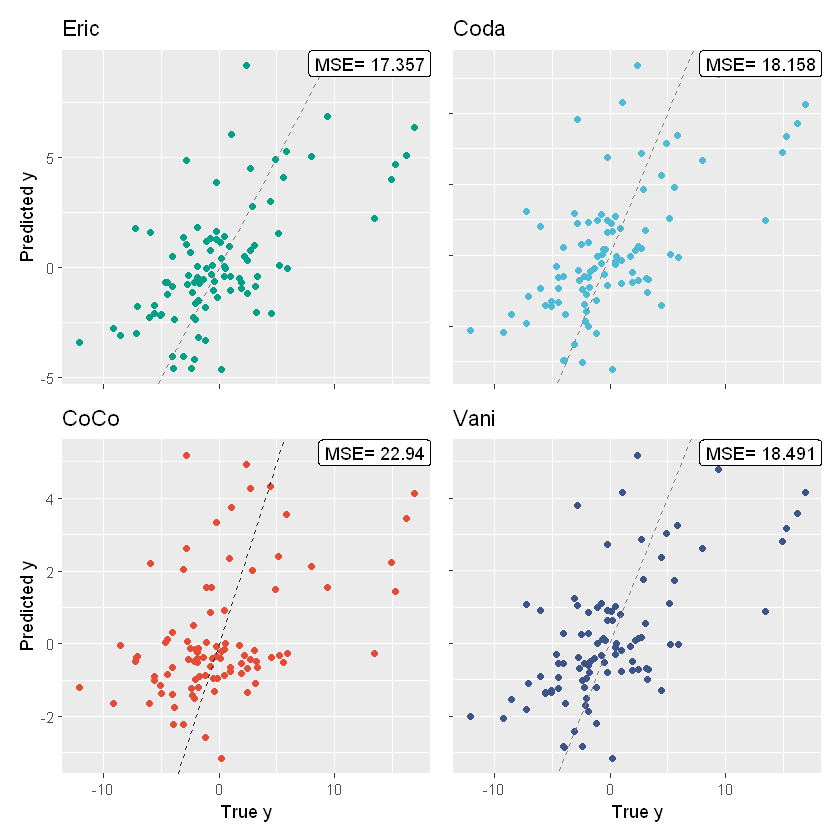

In [14]:
#3a5b63

library(ggplot2)
library(ggsci)
library(patchwork)
model_name <- "Eric"
f1 <- ggplot(data = fit_list) +
    geom_point(aes(x = y, y = Eric), size=1.5,
                             color = '#00A087FF') +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y", y = paste("Predicted y")) +
    ggtitle(model_name)+
    theme(legend.position = "none",axis.text.x = element_blank(),axis.title.x = element_blank())
model_name <- "CoDA"
f2 <- ggplot(data = fit_list) +
    geom_point(aes(x = y, y = CoDA), size=1.5,
                             color = '#4DBBD5FF') +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    ggtitle('Coda')+
    theme(legend.position = "none" ,axis.text.y = element_blank(),axis.title.y = element_blank(),axis.text.x = element_blank(),axis.title.x = element_blank())
model_name <- "CoCo"
f3 <- ggplot(data = fit_list) +
    geom_point(aes(x = y, y = CoCo), size=1.5,
                             color = '#E64B35FF') +
    geom_abline(intercept = 0, slope = 1, color = "#2f281f", linetype = "dashed", ) +
    labs(x = "True y", y = paste("Predicted y")) +
    ggtitle(model_name)+
    theme(legend.position = "none")
model_name <- "Vani"
f4 <- ggplot(data = fit_list) +
 geom_point(aes(x = y, y = Vani),size=1.5,
                             color = '#3C5488FF') +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    ggtitle(model_name)+
    theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())
# Calculate MSE for each model
mse_eric <- mean((fit_list$y - fit_list$Eric)^2)
mse_coda <- mean((fit_list$y - fit_list$CoDA)^2)
mse_coco <- mean((fit_list$y - fit_list$CoCo)^2)
mse_vani <- mean((fit_list$y - fit_list$Vani)^2)

# Add MSE to each plot as a legend with a white background
f1 <- f1 + geom_label(aes(x = Inf, y = Inf, label = paste("MSE=", round(mse_eric, 3))), hjust = 1, vjust = 1, fill = "white",)
f2 <- f2 + geom_label(aes(x = Inf, y = Inf, label = paste("MSE=", round(mse_coda, 3))), hjust = 1, vjust = 1, fill = "white")
f3 <- f3 + geom_label(aes(x = Inf, y = Inf, label = paste("MSE=", round(mse_coco, 3))), hjust = 1, vjust = 1, fill = "white")
f4 <- f4 + geom_label(aes(x = Inf, y = Inf, label = paste("MSE=", round(mse_vani, 3))), hjust = 1, vjust = 1, fill = "white")

f1+f2+f3+f4


brooks

In [10]:
source("R/eic.R")
data(brooks)
library(ggplot2)
library(reshape2)

set.seed(1234567)
model_list <- list()
model_list[["eico"]] <- c(TRUE, TRUE)
model_list[["coda"]] <- c(TRUE, FALSE)
model_list[["coco"]] <- c(FALSE, TRUE)
select_list <- list()
fit_list <- list()
######### data preparation #########
mixture_type <- "PCR_product"

delta <- brooks$delta
meta.data <- brooks$meta.data
obs.counts <- brooks$obs.counts
true.freq <- brooks$true.freq
Gene_names <- c("Avaginae", "Gvaginalis", "Lcrispatus", "Liners", "Pbivia", "Samnii", "GroupBStrep")

otu.tab <- obs.counts[, -which(colnames(obs.counts) == "Other")]
colnames(otu.tab) <- Gene_names
# Remove taxa that are not present by design
otu.tab <- otu.tab * delta

##### Only keep samples that belongs to the given mixture type #####
mix_index <- which(meta.data$Mixture == mixture_type)
meta.data <- meta.data[mix_index, ]
otu.tab <- otu.tab[mix_index, ]
true.freq <- true.freq[mix_index, ]
delta <- delta[mix_index, ]

## Calculate relative abundancies
multi.otu <- which(rowSums(delta) > 1)
otu.tab <- otu.tab[multi.otu, ]
otu.tab <- otu.tab + 0.5
seq.length <- rowSums(otu.tab)
otu.tab <- otu.tab / rowSums(otu.tab)

## delete rows that only have one non-zero entry
true.freq <- true.freq[multi.otu, ]
meta.data <- meta.data[multi.otu, ]
delta <- delta[multi.otu, ]
k.s <- rowSums(delta)

## relative abundance to log matrix
Z <- log(as.matrix(otu.tab))
n <- nrow(Z)
p <- ncol(Z)
eps <- 0.5 / seq.length
X <- as.matrix(true.freq) + as.matrix(eps, n, 1) %*% matrix(1, 1, p)
X <- log(X)
Y <- Z - X
#################### EIC-Lasso ####################
N_bs <- 100
beta_matrix <- array(NA, dim = c(N_bs, 7, 7))
for (model_id in seq_along(model_list)) {
    model <- model_list[[model_id]]
    constrain <- model[1]
    proj <- model[2]
    model_name <- names(model_list)[model_id]
    begin.time <- Sys.time()
    for (n_bs in 1:N_bs) {
        if (n_bs %% 20 == 0) print(paste(n_bs, "%"))
        ## bootstrap
        bs.size <- round(n / 2)
        bs.size <- bs.size - bs.size %% 5 # make sure the size is a multiple of 5 for cross validation
        idx <- sample(1:n, bs.size, replace = TRUE)
        Z_bs <- Z[idx, ]
        nn <- nrow(Z_bs)
        X_bs <- X[idx, ]
        Sig_B <- var(Y[idx, ])

        for (i in 1:p) {
            y_bs <- as.matrix(Y[idx, i])
            fit <- eic(Z_bs, y_bs, nn, p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
            beta_matrix[n_bs, , i] <- fit$beta
        }
    }


    mean_beta <- apply(beta_matrix, c(2, 3), mean)
    beta_sgn <- sign(beta_matrix)
    beta_sgn <- apply(beta_sgn, c(2, 3), mean)
    beta_selected <- beta_matrix != 0
    beta_selected_freq <- apply(beta_selected, c(2, 3), sum) / N_bs
    end.time <- Sys.time()
    print(end.time - begin.time)


    ################ heatmap image ####################
    rownames(beta_selected_freq) <- rownames(Sig_B)
    colnames(beta_selected_freq) <- colnames(Sig_B)
    rownames(beta_sgn) <- rownames(Sig_B)
    colnames(beta_sgn) <- colnames(Sig_B)


    df <- melt(beta_selected_freq)
    df.sgn <- melt(beta_sgn)
    df$sgn <- df.sgn$value
    colnames(df)[colnames(df) == "value"] <- "frequency"
    select_list[[model_name]] <- df

    #################### fit image ####################
    Sig_B <- var(Y)
    # pad the data to make sure the size is a multiple of 5 for cross validation
    n. <- n + 5 - n %% 5
    id <- sample(1:n, n. - n, replace = FALSE)
    Z_add <- rbind(Z, Z[id, ])
    X_add <- rbind(X, X[id, ])
    Y_add <- rbind(Y, Y[id, ])
    Predicted_y <- matrix(NA, n., p)
    for (i in 1:p) {
        y <- as.matrix(Y_add[, i])
        fit <- eic(Z_add, y, n., p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
        intercept <- fit$mean.y - sum(fit$mean.Z * fit$beta)
        Predicted_y[, i] <- X_add %*% fit$beta + intercept
    }

    y.yp <- data.frame("true" = c(Y_add), "pred" = c(Predicted_y), group = factor(rep(Gene_names, each = n.)))
    fit_list[[model_name]] <- y.yp
}

results_list <- list(selected = select_list, fitted = fit_list)
save(results_list, file = paste0("data/brooks_", mixture_type, ".rda"))


[1] "20 %"
[1] "40 %"
[1] "60 %"
[1] "80 %"
[1] "100 %"
Time difference of 1.859766 mins


[1] "ADMM_proj"                 "begin.time"               
 [3] "beta_matrix"               "beta_selected"            
 [5] "beta_selected_freq"        "beta_sgn"                 
 [7] "brooks"                    "bs.size"                  
 [9] "change_NA_value"           "constrain"                
[11] "cross_validation_function" "cv_covariance_matrices"   
[13] "cv_matrices_noproj"        "delta"                    
[15] "df"                        "df.sgn"                   
[17] "eic"                       "end.time"                 
[19] "eps"                       "f1"                       
[21] "f2"                        "f3"                       
[23] "fit"                       "fit_list"                 
[25] "Gene_names"                "i"                        
[27] "id"                        "idx"                      
[29] "intercept"                 "k.s"                      
[31] "l1proj"                    "lambda_max"               
[33] "lasso_covariance"          "lasso_covariance_con"     
[35] "mean_beta"                 "mean_without_NA"          
[37] "meta.data"                 "mix_index"                
[39] "mixture_type"              "model"                    
[41] "model_id"                  "model_list"               
[43] "model_name"                "multi.otu"                
[45] "n"                         "n."                       
[47] "n_bs"                      "N_bs"                     
[49] "nn"                        "obs.counts"               
[51] "otu.tab"                   "p"                        
[53] "p1"                        "p2"                       
[55] "p3"                        "Predicted_y"              
[57] "proj"                      "rescale_without_NA"       
[59] "results_list"              "scale_manual_with_sd"     
[61] "sd_without_NA_block"       "select_list"              
[63] "seq.length"                "Sig_B"                    
[65] "soft_threshold"            "true.freq"                
[67] "X"                         "X_add"                    
[69] "X_bs"                      "y"                        
[71] "Y"                         "y.yp"                     
[73] "Y_add"                     "y_bs"                     
[75] "Z"                         "Z_add"                    
[77] "Z_bs"

Saving 6.67 x 6.67 in image


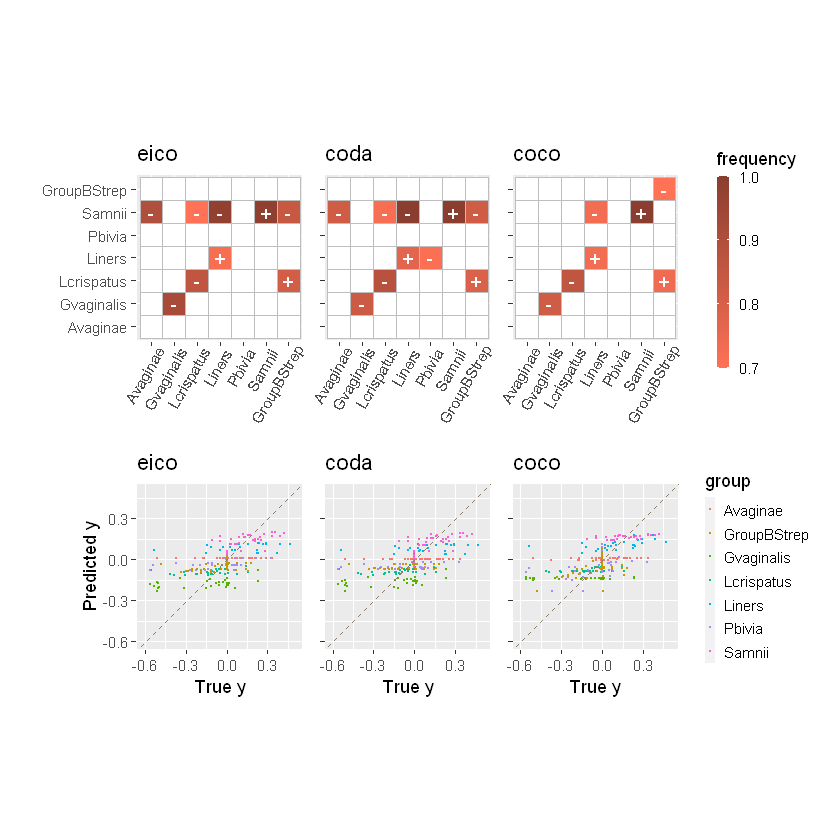

In [9]:
data(brooks_PCR_product)
mixture_type <- "PCR_product"
ls()
library(ggplot2)
library("ggpubr")
library("patchwork")
library("ggnewscale")

select_list <- results_list$selected
fit_list <- results_list$fitted

model_name <- names(select_list)[1]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p1 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency), colour = "grey") +
    geom_text(aes(label = ifelse(sgn > 0, "+", "-")), color = "white") +
    scale_fill_gradient(low = "#FF7256", high = "#8B3E2F", limits = c(0.7, 1), na.value = "white") +
    theme(axis.title = element_blank()) +

    theme(axis.title = element_blank()) +
    theme(axis.text.x =element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name) +
    theme(legend.position = "none")
    
model_name <- names(select_list)[2]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p2 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency), colour = "grey") +
    geom_text(aes(label = ifelse(sgn > 0, "+", "-")), color = "white") +
    scale_fill_gradient(low = "#FF7256", high = "#8B3E2F", limits = c(0.7, 1), na.value = "white") +
    theme(axis.title = element_blank()) +
    theme(axis.text.y = element_blank(), axis.text.x = element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")
    
    
model_name <- names(select_list)[3]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p3 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency), colour = "grey") +
    geom_text(aes(label = ifelse(sgn > 0, "+", "-")), color = "white") +
    scale_fill_gradient(low = "#FF7256", high = "#8B3E2F", limits = c(0.7, 1), na.value = "white") +
    theme(axis.title = element_blank()) +
    theme(axis.text.y = element_blank(), axis.text.x = element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name) +
    guides(fill = guide_colourbar(barwidth = 0.5,
                                barheight = 8))


# & theme(legend.position='bottom',legend.box=)

model_name <- names(select_list)[1]
y.yp <- fit_list[[model_name]]
f1 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y", y = "Predicted y") +
    # xlim(-2.85, 1.8) +
    # xlim(-1.5,1.5) +
    xlim(-0.6,0.5) +
    ylim(-0.6,0.5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

model_name <- names(select_list)[2]
y.yp <- fit_list[[model_name]]
f2 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    xlim(-0.6,0.5) +
    ylim(-0.6,0.5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())

model_name <- names(select_list)[3]
y.yp <- fit_list[[model_name]]
f3 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    xlim(-0.6,0.5) +
    ylim(-0.6,0.5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(axis.text.y = element_blank(),legend.key.height = unit(0.5, "cm"),
          legend.key.width = unit(0.2, "cm"),axis.title.y = element_blank())


p1 + p2 + p3 + f1 + f2 + f3 + plot_layout(ncol = 3, nrow = 2)
#  + plot_annotation(title=mixture_type, theme = theme(plot.title = element_text(hjust = 0.5,vjust = -95, size = 20)))
# ggsave("figures/brooks_DNA.pdf")
ggsave(paste0("figures/brooks_", mixture_type, ".pdf"))

costea

In [ ]:
# fit with protocol specification

data(costea_observed)
data(costea_mock)
library(ggplot2)
library(dplyr)
library(tidyr)
source("R/eic.R")


set.seed(1234567)
model_list <- list()
fit_list <- list()
coestea_fit_results <- list()
model_list[["eico"]] <- c(TRUE, TRUE)
model_list[["coda"]] <- c(TRUE, FALSE)
model_list[["coco"]] <- c(FALSE, TRUE)
protocol_list <- c("Q", "W","H")
######### data preparation #########
for(protocol in protocol_list){
Obs_Q  <- Obs %>% filter(Protocol==protocol,Taxon!='Contaminant') %>% select(Taxon,Observed,Individual)

# Pivot the dataframe
Obs_Q <- Obs_Q %>% pivot_wider(id_cols=Individual,names_from = Taxon, values_from = Observed, values_fill = 0)
gene_names <- colnames(Obs_Q)[-1]
indiv_names <- Obs_Q$Individual

Obs_Q <- data.matrix(Obs_Q[-1])
Obs_Q <- Obs_Q/rowSums(Obs_Q) #sale to sum-to-one
mock_t <- mock %>% pivot_wider(names_from = Taxon, values_from = FACS, values_fill = 0) %>%select(all_of(gene_names))


Act <- data.matrix(mock_t)
Act <- Act/rowSums(Act) #sale to sum-to-one

## relative abundance to log matrix
if(any(Obs_Q==0)){
    stop("Obs_Q has zero entries")
}
Z <- log(Obs_Q)
n <- nrow(Z)
p <- ncol(Z)
X <- rep(Act,each=n) %>% matrix(ncol=ncol(Act),byrow = F) %>% log()

Y <- Z - X

#################### EIC-Lasso ####################

for (model_id in seq_along(model_list)) {
    model <- model_list[[model_id]]
    constrain <- model[1]
    proj <- model[2]
    model_name <- names(model_list)[model_id]
    begin.time <- Sys.time()
    #################### fit image ####################
    Sig_B <- var(Y)
    pad the data to make sure the size is a multiple of 3 for cross validation
    n. <- n + 5 - n %% 5
    id <- sample(1:n, n. - n, replace = FALSE)
    Z_add <- rbind(Z, Z[id, ])
    X_add <- rbind(X, X[id, ])
    Y_add <- rbind(Y, Y[id, ])
    Predicted_y <- matrix(NA, n., p)
    for (i in 1:p) {
        y <- as.matrix(Y_add[, i])
        fit <- eic(Z_add, y, n., p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
        intercept <- fit$mean.y - sum(fit$mean.Z * fit$beta)
        Predicted_y[, i] <- X_add %*% fit$beta + intercept
    }

    y.yp <- data.frame("true" = c(Y_add), "pred" = c(Predicted_y), group = factor(rep(gene_names, each = n.)))
    fit_list[[model_name]] <- y.yp
}
coestea_fit_results[[protocol]] <- fit_list
}

# combine fit_list and select_list
save(coestea_fit_results,file="data/costea_fit.rda")


Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."


ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'figures/coestea_fit.pdf'


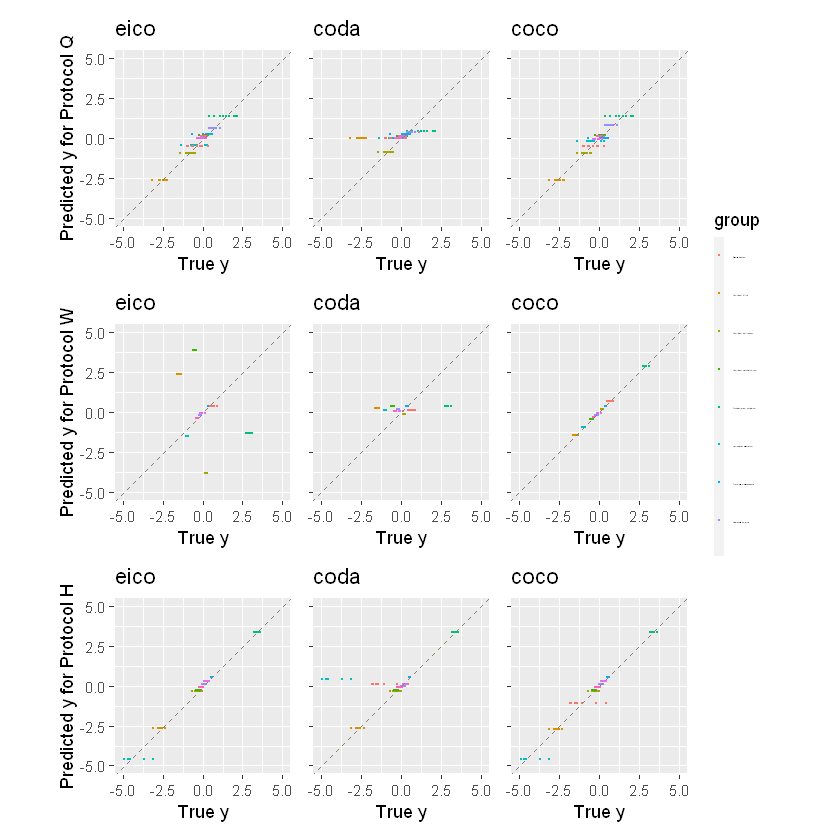

In [9]:
# plot costea_fit with protocol specification
library(ggplot2)
library("ggpubr")
library("patchwork")
data(costea_fit)
f_list <- list()

for(protocol in c("H","Q","W")){
fit_list <- coestea_fit_results[[protocol]]
model_name <- names(fit_list)[[1]]
y.yp <- fit_list[[model_name]]

f1 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y", y = paste("Predicted y for Protocol",protocol)) +
    # xlim(-2.85, 1.8) +
    # xlim(-1.5,1.5) +
    xlim(-5,5) +
    ylim(-5,5)  +
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

model_name <- names(fit_list)[2]
y.yp <- fit_list[[model_name]]
f2 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    xlim(-5,5) +
    ylim(-5,5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())

model_name <- names(fit_list)[3]
y.yp <- fit_list[[model_name]]
f3 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    xlim(-5,5) +
    ylim(-5,5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())

if(protocol=='W') {f3 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    xlim(-5,5) +
    ylim(-5,5) +
    coord_equal() +
    ggtitle(model_name)+
    theme(axis.text.y = element_blank(),
    legend.text = element_text(size = 0.6),
    legend.key.height = unit(0.8, "cm"),
          legend.key.width = unit(0.2, "cm"),axis.title.y = element_blank())}

f_list[[protocol]] <- f1+f2+f3
}
f_list$Q / f_list$W / f_list$H 
ggsave("figures/coestea_fit.pdf", width = 14, height = 8)

drafts

In [ ]:
# heatmap plot with double colors for brooks

model_name <- names(select_list)[1]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p1 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency),data=subset(df,sgn>=0), colour = "grey") +
    scale_fill_gradient("frequency",low = "#FF7256", high = "#8B3E2F", na.value = "white",limits=c(0.7,1)) +

    new_scale("fill") +
    geom_tile(aes(fill = frequency), colour = "grey",data=subset(df,sgn<0)) +
    scale_fill_gradient(low = "#4646f0d4", high = "#2626cd", na.value = "white",limits=c(0.7,1)) +

    theme(axis.title = element_blank()) +
    theme(axis.text.x =element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name) +
    theme(legend.position = "none")
    
model_name <- names(select_list)[2]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p2 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency), colour = "grey") +
    geom_text(aes(label = ifelse(sgn > 0, "+", "-")), color = "white") +
    scale_fill_gradient(low = "#FF7256", high = "#8B3E2F", limits = c(0.7, 1), na.value = "white") +
    theme(axis.title = element_blank()) +
    theme(axis.text.y = element_blank(), axis.text.x = element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")
    
    
model_name <- names(select_list)[3]
df <- select_list[[model_name]]
df$frequency[abs(df$frequency) < 0.7] <- NA
p3 <- ggplot(df, aes(Var1, Var2)) +
    geom_tile(aes(fill = frequency), colour = "grey") +
    geom_text(aes(label = ifelse(sgn > 0, "+", "-")), color = "white") +
    scale_fill_gradient(low = "#FF7256", high = "#8B3E2F", limits = c(0.7, 1), na.value = "white") +
    theme(axis.title = element_blank()) +
    theme(axis.text.y = element_blank(), axis.text.x = element_text(angle = 60, vjust = 1, hjust = 0.9))+
    coord_equal() +
    ggtitle(model_name) +
    guides(fill = guide_colourbar(barwidth = 0.5,
                                barheight = 8))


p1+p2+p3
# & theme(legend.position='bottom',legend.box=)

In [6]:
# costea fit with bootstrap
set.seed(1234567)
source("R/eic.R")
model_list <- list()
select_list <- list()
coestea_select_results <- list()
model_list[["eico"]] <- c(TRUE, TRUE)
model_list[["coda"]] <- c(TRUE, FALSE)
model_list[["coco"]] <- c(FALSE, TRUE)
protocol_list <- c("Q", "W","H")
######### data preparation #########
for(protocol in protocol_list){
Obs_Q  <- Obs %>% filter(Protocol==protocol,Taxon!='Contaminant') %>% select(Taxon,Observed,Individual)

# Pivot the dataframe
Obs_Q <- Obs_Q %>% pivot_wider(id_cols=Individual,names_from = Taxon, values_from = Observed, values_fill = 0)
gene_names <- colnames(Obs_Q)[-1]
indiv_names <- Obs_Q$Individual

Obs_Q <- data.matrix(Obs_Q[-1])
Obs_Q <- Obs_Q/rowSums(Obs_Q) #sale to sum-to-one
mock_t <- mock %>% pivot_wider(names_from = Taxon, values_from = FACS, values_fill = 0) %>%select(all_of(gene_names))


Act <- data.matrix(mock_t)
Act <- Act/rowSums(Act) #sale to sum-to-one

## relative abundance to log matrix
if(any(Obs_Q==0)){
    stop("Obs_Q has zero entries")
}
Z <- log(Obs_Q)
n <- nrow(Z)
p <- ncol(Z)
X <- rep(Act,each=n) %>% matrix(ncol=ncol(Act),byrow = F) %>% log()

clr <- function(X) {
    return(X - rowMeans(X))
}
Y <- clr(Z - X)

#################### EIC-Lasso ####################
N_bs <- 100
beta_matrix <- array(NA, dim = c(N_bs, p, p))
for (model_id in seq_along(model_list)) {
    model <- model_list[[model_id]]
    constrain <- model[1]
    proj <- model[2]
    model_name <- names(model_list)[model_id]
    begin.time <- Sys.time()
    for (n_bs in 1:N_bs) {
        if (n_bs %% 20 == 0) print(paste(n_bs, "%"))
        ## bootstrap
        bs.size <- 5
        idx <- sample(1:n, bs.size, replace = TRUE)
        Z_bs <- Z[idx, ]
        nn <- nrow(Z_bs)
        X_bs <- X[idx, ]
        Sig_B <- var(Y[idx, ])

        for (i in 1:p) {
            y_bs <- as.matrix(Y[idx, i])
            fit <- eic(Z_bs, y_bs, nn, p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
            beta_matrix[n_bs, , i] <- fit$beta
            centered_X <- X_bs - rep(fit$mean.Z, each = nn)
            estimated_y <- centered_X %*% fit$beta
        }
    }


    mean_beta <- apply(beta_matrix, c(2, 3), mean)
    beta_sgn <- sign(beta_matrix)
    beta_sgn <- apply(beta_sgn, c(2, 3), mean)
    beta_selected <- beta_matrix != 0
    beta_selected_freq <- apply(beta_selected, c(2, 3), sum) / N_bs
    end.time <- Sys.time()
    print(end.time - begin.time)


    ################ heatmap image ####################
    rownames(beta_selected_freq) <- rownames(Sig_B)
    colnames(beta_selected_freq) <- colnames(Sig_B)
    rownames(beta_sgn) <- rownames(Sig_B)
    colnames(beta_sgn) <- colnames(Sig_B)


    df <- melt(beta_selected_freq)
    df.sgn <- melt(beta_sgn)
    df$sgn <- df.sgn$value
    select_list[[model_name]] <- df %>% rename(frequency = value)
}
coestea_select_results[[protocol]] <- select_list
}
# combine fit_list and select_list
save(coestea_select_results,file="data/costea_select.rda")


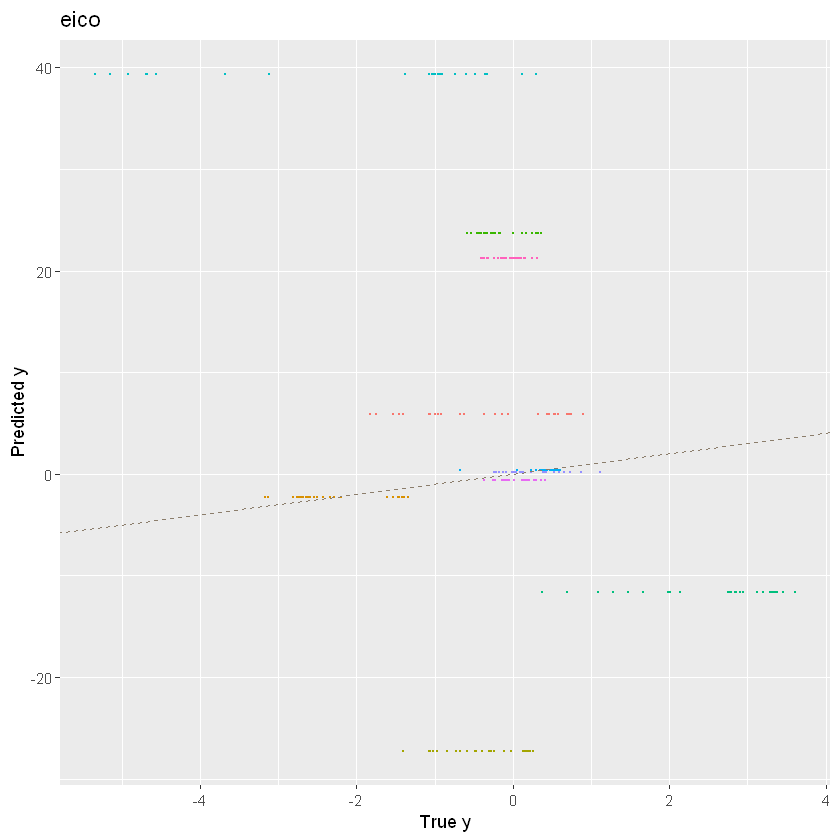

In [8]:
# costea fit plot with no protocol specification
library(ggplot2)
library("ggpubr")
library("patchwork")
data(costea_fit_all)
fit_list <- coestea_fit_results
# for (name in names(coestea_fit_results[[1]])){
#     fit_list[[name]] <- rbind(coestea_fit_results[[1]][[name]],coestea_fit_results[[2]][[name]],coestea_fit_results[[3]][[name]])
# }
model_name <- names(fit_list)[[1]]
y.yp <- fit_list[[model_name]]

f1 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y", y = paste("Predicted y")) +
    # xlim(-5,5) +
    # ylim(-5,5)  +
    # coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

# model_name <- names(fit_list)[2]
# y.yp <- fit_list[[model_name]]
# f2 <- ggplot(data = y.yp) +
#     geom_point(aes(x = true, y = pred, color = group),size=0.3) +
#     geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
#     labs(x = "True y") +
#     xlim(-5,5) +
#     ylim(-5,5) +
#     coord_equal() +
#     ggtitle(model_name)+
#     theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())

# model_name <- names(fit_list)[3]
# y.yp <- fit_list[[model_name]]
# f3 <- ggplot(data = y.yp) +
#     geom_point(aes(x = true, y = pred, color = group),size=0.3) +
#     geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
#     labs(x = "True y") +
#     xlim(-5,5) +
#     ylim(-5,5) +
#     coord_equal() +
#     ggtitle(model_name)+
#     theme(legend.position = "none",axis.text.y = element_blank(),axis.title.y = element_blank())

# f1+f2+f3
f1
ggsave("figures/coestea_fit_all.pdf", width = 14, height = 8)

In [ ]:
# fit with no protocol specification

data(costea_observed)
data(costea_mock)
library(ggplot2)
library(dplyr)
library(tidyr)
source("R/eic.R")


set.seed(1234567)
model_list <- list()
fit_list <- list()
coestea_fit_results <- list()
model_list[["eico"]] <- c(TRUE, TRUE)
model_list[["coda"]] <- c(TRUE, FALSE)
model_list[["coco"]] <- c(FALSE, TRUE)
######### data preparation #########
Obs_Q  <- Obs %>% filter(Taxon!='Contaminant') %>% select(Taxon,Observed,Sample)

# Pivot the dataframe
Obs_Q <- Obs_Q %>% pivot_wider(id_cols=Sample,names_from = Taxon, values_from = Observed)

gene_names <- colnames(Obs_Q)[-1]
indiv_names <- Obs_Q$Sample

Obs_Q <- data.matrix(Obs_Q[-1])
Obs_Q <- Obs_Q/rowSums(Obs_Q) #sale to sum-to-one
mock_t <- mock %>% pivot_wider(names_from = Taxon, values_from = FACS, values_fill = 0) %>%select(all_of(gene_names))


Act <- data.matrix(mock_t)
Act <- Act/rowSums(Act) #sale to sum-to-one

## relative abundance to log matrix
if(any(Obs_Q==0)){
    stop("Obs_Q has zero entries")
}
Z <- log(Obs_Q)
n <- nrow(Z)
p <- ncol(Z)
X <- rep(Act,each=n) %>% matrix(ncol=ncol(Act),byrow = F) %>% log()

Y <- Z - X

#################### EIC-Lasso ####################

for (model_id in seq_along(model_list)) {
    model <- model_list[[model_id]]
    constrain <- model[1]
    proj <- model[2]
    model_name <- names(model_list)[model_id]
    begin.time <- Sys.time()
    #################### fit image ####################
    Sig_B <- var(Y)
    # pad the data to make sure the size is a multiple of 3 for cross validation
    n. <- n + 5 - n %% 5
    id <- sample(1:n, n. - n, replace = FALSE)
    Z_add <- rbind(Z, Z[id, ])
    X_add <- rbind(X, X[id, ])
    Y_add <- rbind(Y, Y[id, ])
    Predicted_y <- matrix(NA, n., p)
    for (i in 1:p) {
        y <- as.matrix(Y_add[, i])
        fit <- eic(Z_add, y, n., p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
        intercept <- fit$mean.y - sum(fit$mean.Z * fit$beta)
        Predicted_y[, i] <- X_add %*% fit$beta + intercept
    }

    y.yp <- data.frame("true" = c(Y_add), "pred" = c(Predicted_y), group = factor(rep(gene_names, each = n.)))
    fit_list[[model_name]] <- y.yp
}
coestea_fit_results <- fit_list
# combine fit_list and select_list
save(coestea_fit_results,file="data/costea_fit_all.rda")


Mo2022

In [47]:
library(ggplot2)
library(dplyr)
library(tidyr)
source("R/eic.R")
# load data from "data\tyx.new_otu_table_09282022.csv"
read.csv("data/mo.csv",header = T,row.names = 1) -> tyx
abundance <- tyx[,1:(ncol(tyx)-9)] 
sam <- tyx[,(ncol(tyx)-8):ncol(tyx)]
protocol_list <- c('Enzymes','Lifeguard','Base','RNAProtect')
tax_names <- c("Staphylococcus","Bacillus","Lactobacillus","Listeria","Enterococcus","Salmonella","Escherichia.Shigella","Pseudomonas")


Act <- c(0.133,0.157,0.188,0.159,0.104,0.113,0.1,0.046)
mo_fit_results <- list()
model_list <- list('eic'=c(TRUE, TRUE),'coda'=c(TRUE, FALSE),'coco'=c(FALSE, TRUE))
for(protocol in protocol_list){
abundance_q <- abundance %>% select(ends_with(tax_names,ignore.case = F)) %>% filter(sam$Extraction==protocol)
colnames(abundance_q) <- tax_names
delta <- abundance_q != 0
abundance_q <- data.matrix(abundance_q) + 0.5
Obs_Q <- abundance_q/rowSums(abundance_q) #sale to sum-to-one
Z <- log(Obs_Q)
n <- nrow(Z)
p <- ncol(Z)
X <- rep(Act,each=n) %>% matrix(ncol=length(Act),byrow = F) %>% log()

Y <- Z - X

#################### EIC-Lasso ####################
fit_list <- list()
for (model_id in seq_along(model_list)) {
    model <- model_list[[model_id]]
    constrain <- model[1]
    proj <- model[2]
    model_name <- names(model_list)[model_id]
    begin.time <- Sys.time()
    #################### fit image ####################
    Sig_B <- lapply(1:p,function(i) var(Y[delta[,i],i])) %>% c() %>% diag()
    # pad the data to make sure the size is a multiple of 3 for cross validation
    n. <- n + 5 - n %% 5
    id <- sample(1:n, n. - n, replace = FALSE)
    Z_add <- rbind(Z, Z[id, ])
    X_add <- rbind(X, X[id, ])
    Y_add <- rbind(Y, Y[id, ])
    Predicted_y <- matrix(NA, n., p)
    for (i in 1:p) {
        y <- as.matrix(Y_add[, i])
        fit <- eic(Z_add, y, n., p, Sig_B = Sig_B, K = 5, noise = "additive", penalty = "lasso", proj = proj, constrain = constrain, scale.Z = FALSE, scale.y = FALSE)
        intercept <- fit$mean.y - sum(fit$mean.Z * fit$beta)
        Predicted_y[, i] <- X_add %*% fit$beta + intercept
    }

    y.yp <- data.frame("true" = c(Y_add), "pred" = c(Predicted_y), group = factor(rep(tax_names, each = n.)))
    fit_list[[model_name]] <- y.yp
}
mo_fit_results[[protocol]] <- fit_list
}

# combine fit_list and select_list
save(mo_fit_results,file="data/mo_fit.rda")


In [49]:
# plot costea_fit with protocol specification
library(ggplot2)
library("ggpubr")
library("patchwork")
f_list <- list()

for(protocol in c('Enzymes','Lifeguard','Base','RNAProtect')){
fit_list <- mo_fit_results[[protocol]]
model_name <- names(fit_list)[[1]]
y.yp <- fit_list[[model_name]]

f1 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.15) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y", y = paste("Predicted y for Protocol",protocol)) +
    # xlim(-2.85, 1.8) +
    # xlim(-1.5,1.5) +
    # xlim(-5,5) +
    # ylim(-5,5)  +
    # coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

model_name <- names(fit_list)[2]
y.yp <- fit_list[[model_name]]
f2 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    # xlim(-5,5) +
    # ylim(-5,5) +
    # coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

model_name <- names(fit_list)[3]
y.yp <- fit_list[[model_name]]
f3 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    # xlim(-5,5) +
    # ylim(-5,5) +
    # coord_equal() +
    ggtitle(model_name)+
    theme(legend.position = "none")

if(protocol=='RNAProtect') {f3 <- ggplot(data = y.yp) +
    geom_point(aes(x = true, y = pred, color = group),size=0.3) +
    geom_abline(intercept = 0, slope = 1, color = "#8B7D6B", linetype = "dashed", ) +
    labs(x = "True y") +
    # xlim(-5,5) +
    # ylim(-5,5) +
    # coord_equal() +
    ggtitle(model_name)+
    theme(axis.text.y = element_blank(),
    legend.text = element_text(size = 0.6),
    legend.key.height = unit(0.8, "cm"),
          legend.key.width = unit(0.2, "cm"))}

f_list[[protocol]] <- f1+f2+f3
}
f_list$Q / f_list$W / f_list$H 
ggsave("figures/mo_fit.pdf", width = 14, height = 8)

numeric(0)

In [12]:
source("simulation/generate_data.R")
n <- 50
p <- 100
beta_star <- c(1.2, -0.8, 0.7, 0, 0, -1.5, -1, 1.4, rep(0, p - 8))
theta <- c(rep(log(0.5 * p), 5), rep(0, p - 5))
sigma <- 0.5
rho <- 0.5
tau <- 0.5


N_MK <- 100000 %/% p
data <- generate_data(n, p, beta_star,0.5, 0.5, 0.5, theta = theta, type = "lognormal")
# varB <- array(NA, c(N_MK, p, p))
# varB2 <- array(NA, c(N_MK, p, p))
varB <- matrix(NA, N_MK, p)
varB2 <- matrix(NA, N_MK, p)
for (mk in 1:N_MK) {
    tmp_data <- generate_multinom_data(n, p, beta_star, sigma, rho, theta = theta, type = "multinom", overdispersion = 5e+3)
    B <- tmp_data$Z - tmp_data$X
    varB[mk,] <- diag(var(B))
    varB2[mk,] <- diag(var(tmp_data$Z)) - diag(var(tmp_data$X))
}
varB <- colMeans(varB)
varB[1:5] <- mean(varB[1:5])
varB[6:p] <- mean(varB[6:p])
varB2 <- colMeans(varB2)
varB2[1:5] <- mean(varB2[1:5])
varB2[6:p] <- mean(varB2[6:p])


test_data <- generate_multinom_data(30, p, beta_star, sigma, rho, theta = theta)
# true.diff <- t(test_data$Z) %*% test_data$Z / n - t(test_data$X) %*% test_data$X / n
true.diff <- diag(var(test_data$Z)) - diag(var(test_data$X))
print("no estimate")
print(mean(abs(true.diff)))
print(sum(true.diff^2))
# print(norm(true.diff, "F"))
print("use var(B)")
print(mean(abs(true.diff - varB)))
print(sum((true.diff-varB)^2))
# print(norm(true.diff - varB, "F"))
print("use -var(B)")
print(mean(abs(true.diff + varB)))
print(sum((true.diff+varB)^2))
# print(norm(true.diff + Sig_B, "F"))
print("use cov(Z-X)")
print(mean(abs(true.diff - varB2)))
print(sum((true.diff-varB2)^2))
# print(norm(true.diff - Sig_B2, "F"))

[1] "no estimate"
[1] 1.121325e-16
[1] 2.52682e-30
[1] "use var(B)"
[1] 0.07036593
[1] 0.5196357
[1] "use -var(B)"
[1] 0.07036593
[1] 0.5196357
[1] "use cov(Z-X)"
[1] 1.123193e-16
[1] 2.525782e-30


: 